In [1]:
maindf = pd.read_csv('../train.csv')
maindf.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [81]:
df1 = maindf
SalePrice = df1["SalePrice"]
df7181 = df1.iloc[:, 71:81]



In [82]:
print(df7181.columns)
df7181.describe()

Index(['PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')


,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [83]:
df7181_PoolQC = pd.DataFrame(df7181, columns=['PoolQC'])
df7181_f2 = df7181.groupby(['PoolQC']).size().reset_index(name='Counts')
df7181_f2   #수영장 상태 : Excellent Good Fair No Pool

,PoolQC,Counts
0,Ex,2
1,Fa,2
2,Gd,3


In [87]:
df7181_Fence = pd.DataFrame(df7181, columns=['Fence'])
df7181_Fence["SalePrice"] = df7181['SalePrice']
df7181_f2 = df7181.groupby(['Fence']).size().reset_index(name='Counts')
df7181_f2   #울타리 상태 : Good Privacy  Good Wood   Minimum Wood/Wire  Minimum Privacy  No Fence


,Fence,Counts
0,GdPrv,59
1,GdWo,54
2,MnPrv,157
3,MnWw,11


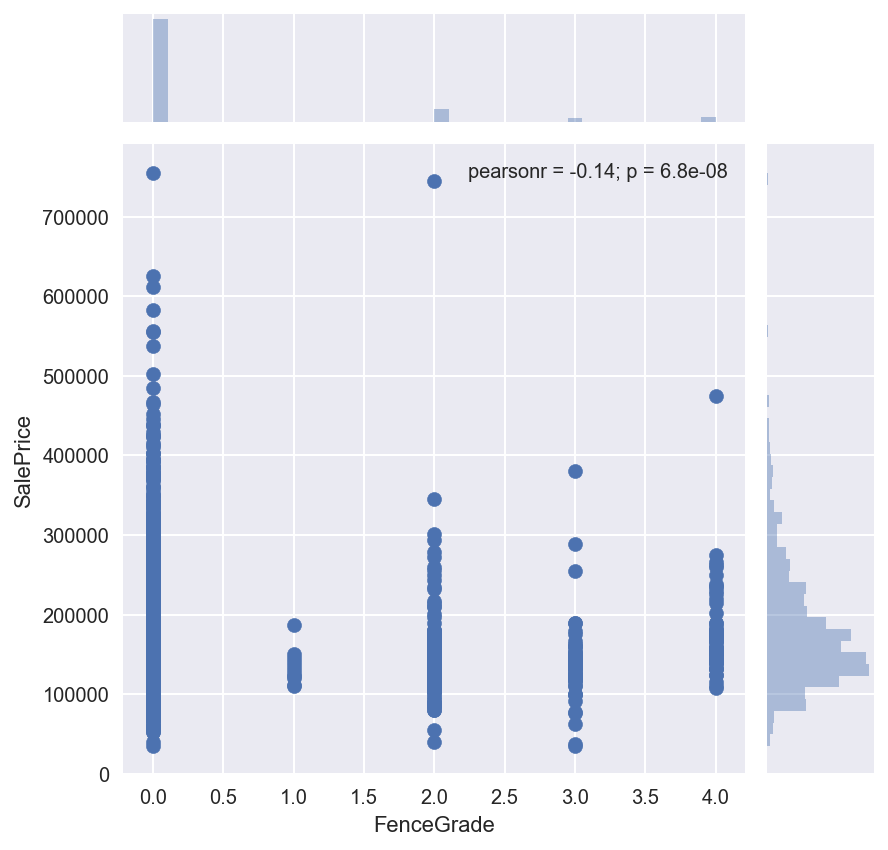

In [89]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
def fencegrade(data) :
    if data == 'GdPrv':
        return 4
    if data == 'GdWo':
        return 3
    if data == 'MnPrv':
        return 2
    if data == 'MnWw':
        return 1
    else:
        return 0
df7181_Fence['FenceGrade'] = df7181_Fence['Fence'].apply(fencegrade)
sns.jointplot(x="FenceGrade", y="SalePrice", data=df7181_Fence)

In [96]:
df7181_MiscFeature = pd.DataFrame(df7181, columns=['MiscFeature'])
df7181_MiscFeature["SalePrice"] = df7181['SalePrice']
df7181_f2 = df7181.groupby(['MiscFeature']).size().reset_index(name='Counts')
df7181_f2   #기타 기능 : 2nd Garage   Other  Shed (over 100 SF)   Tennis Court 

,MiscFeature,Counts
0,Gar2,2
1,Othr,2
2,Shed,49
3,TenC,1


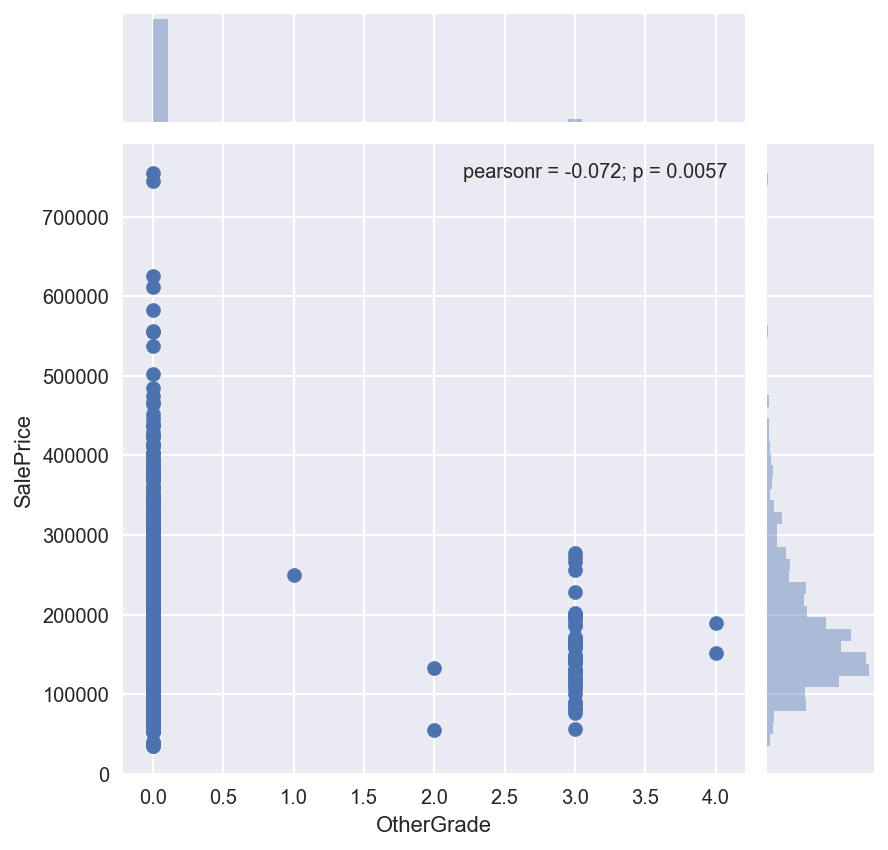

In [97]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
def othergrade(data) :
    if data == 'Gar2':
        return 4
    if data == 'Shed':
        return 3
    if data == 'Othr':
        return 2
    if data == 'TenC':
        return 1
    else:
        return 0
df7181_MiscFeature['OtherGrade'] = df7181_MiscFeature['MiscFeature'].apply(othergrade)
sns.jointplot(x="OtherGrade", y="SalePrice", data=df7181_MiscFeature)

In [103]:
df7181_SaleType = pd.DataFrame(df7181, columns=['SaleType'])
df7181_SaleType["SalePrice"] = df7181['SalePrice']
df7181_f2 = df7181.groupby(['SaleType']).size().reset_index(name='Counts')
df7181_f2  

#        WD 	Warranty Deed - Conventional
#        CWD	Warranty Deed - Cash
#        VWD	Warranty Deed - VA Loan
#        New	Home just constructed and sold
#        COD	Court Officer Deed/Estate
#        Con	Contract 15% Down payment regular terms
#        ConLw	Contract Low Down payment and low interest
#        ConLI	Contract Low Interest
#        ConLD	Contract Low Down
#        Oth	Other
      

,SaleType,Counts
0,COD,43
1,CWD,4
2,Con,2
3,ConLD,9
4,ConLI,5
5,ConLw,5
6,New,122
7,Oth,3
8,WD,1267


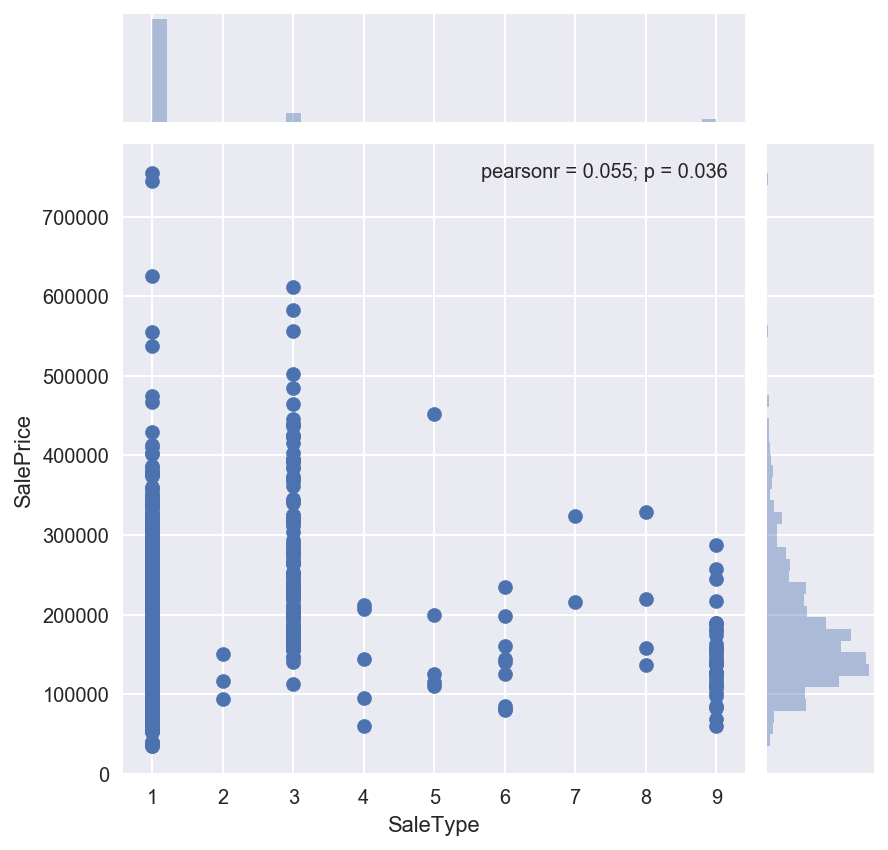

In [100]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
def SaleTypegrade(data) :
    if data == 'COD':
        return 9
    if data == 'CWD':
        return 8
    if data == 'Con':
        return 7
    if data == 'ConLD':
        return 6
    if data == 'ConLI':
        return 5
    if data == 'ConLw':
        return 4
    if data == 'New':
        return 3
    if data == 'Oth':
        return 2
    if data == 'WD':
        return 1
    else:
        return 0
df7181_SaleType['SaleType'] = df7181_SaleType['SaleType'].apply(SaleTypegrade)
sns.jointplot(x="SaleType", y="SalePrice", data=df7181_SaleType)

In [104]:
df7181_SaleCondition = pd.DataFrame(df7181, columns=['SaleCondition'])
df7181_SaleCondition["SalePrice"] = df7181['SalePrice']
df7181_f2 = df7181.groupby(['SaleCondition']).size().reset_index(name='Counts')
df7181_f2  

,SaleCondition,Counts
0,Abnorml,101
1,AdjLand,4
2,Alloca,12
3,Family,20
4,Normal,1198
5,Partial,125


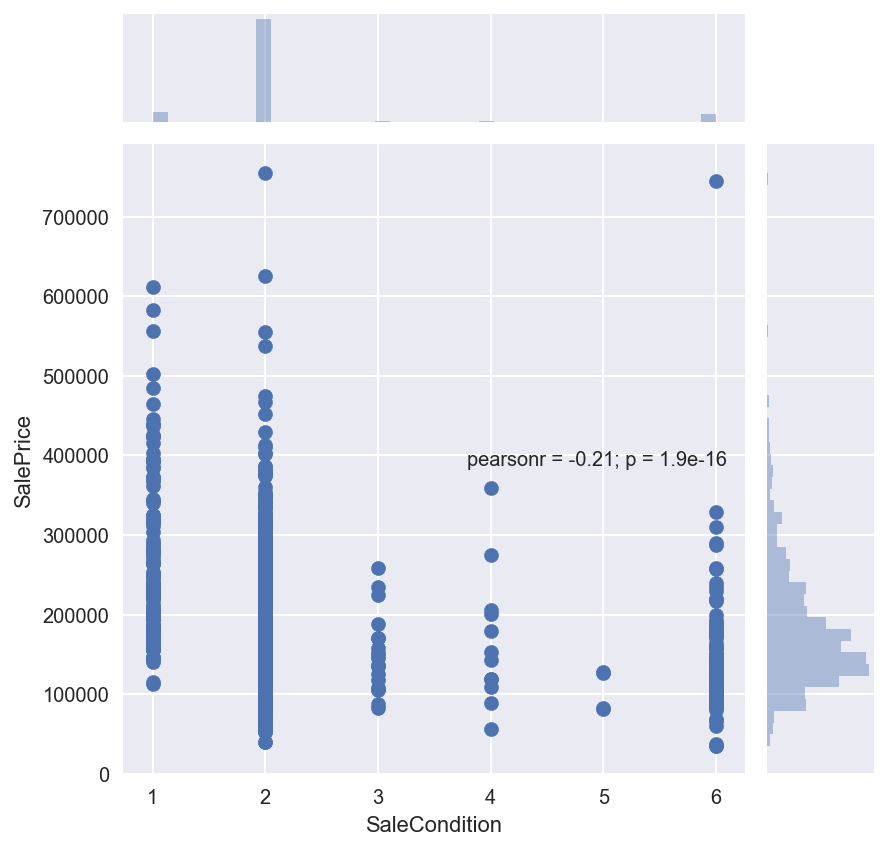

In [105]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
def SaleConditiongrade(data) :
    if data == 'Abnorml':
        return 6
    if data == 'AdjLand':
        return 5
    if data == 'Alloca':
        return 4
    if data == 'Family':
        return 3
    if data == 'Normal':
        return 2
    if data == 'Partial':
        return 1
    else:
        return 0
df7181_SaleCondition['SaleCondition'] = df7181_SaleCondition['SaleCondition'].apply(SaleConditiongrade)
sns.jointplot(x="SaleCondition", y="SalePrice", data=df7181_SaleCondition)